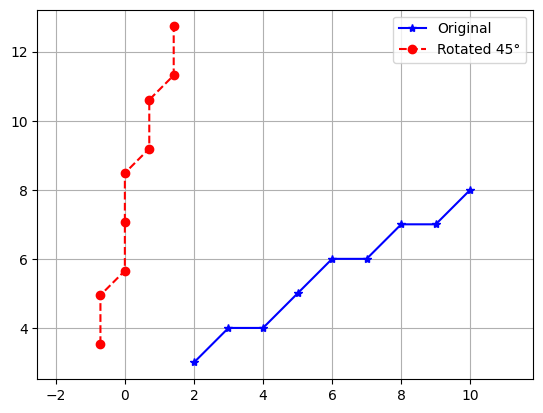

In [1]:
# LAB-8
# Implement pure rotation about the origin using the given rotation matrix

import numpy as np
import matplotlib.pyplot as plt

def bresenham_line(x0, y0, x1, y1):
    xes, yes = [], []
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x1 >= x0 else -1
    sy = 1 if y1 >= y0 else -1
    x, y = x0, y0

    if dx >= dy:
        p = 2 * dy - dx
        for _ in range(dx + 1):
            xes.append(x)
            yes.append(y)
            x += sx
            if p >= 0:
                y += sy
                p += 2 * dy - 2 * dx
            else:
                p += 2 * dy
    else:
        p = 2 * dx - dy
        for _ in range(dy + 1):
            xes.append(x)
            yes.append(y)
            y += sy
            if p >= 0:
                x += sx
                p += 2 * dx - 2 * dy
            else:
                p += 2 * dx

    return np.array(xes), np.array(yes)

def apply_transform(x, y, M):
    pts = np.vstack([x, y, np.ones_like(x)])
    t = M @ pts
    return t[0], t[1]

x0, y0, x1, y1 = 2, 3, 10, 8
x, y = bresenham_line(x0, y0, x1, y1)

theta = np.pi / 4
R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta),  np.cos(theta), 0],
              [0, 0, 1]])

xt, yt = apply_transform(x, y, R)

plt.plot(x, y, 'b-*', label="Original")
plt.plot(xt, yt, 'r--o', label="Rotated 45°")
plt.legend(); plt.grid(); plt.axis('equal')
plt.show()
